In [2]:
from __future__ import absolute_import,division,print_function,unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-rc1


In [3]:
fash_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fash_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
len(train_images),len(train_labels)

(60000, 60000)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
len(test_labels)

10000

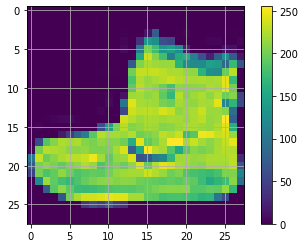

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(True)
plt.colorbar()
plt.show()

In [12]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
train_images = train_images/255.0
test_images = test_images/255.0

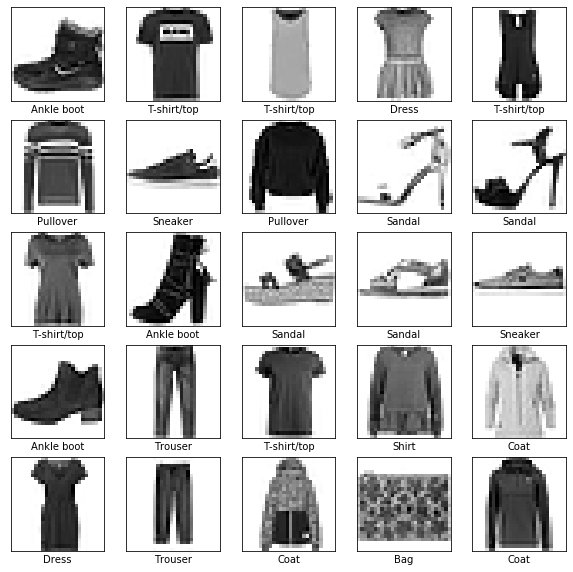

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
# Building the neural network Layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
model.fit(train_images,train_labels,epochs=4)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 11s 179us/sample - loss: 0.4979 - accuracy: 0.8252
Epoch 2/4
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3781 - accuracy: 0.8628
Epoch 3/4
60000/60000 [==============================] - 8s 137us/sample - loss: 0.3356 - accuracy: 0.8772
Epoch 4/4
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3118 - accuracy: 0.8863


In [26]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [28]:
test_labels[0]

9

In [29]:
prediction = model.predict(test_images)
prediction[0]

array([1.5161413e-06, 3.8386369e-07, 1.4217859e-06, 7.8249735e-07,
       7.0375550e-06, 1.0519261e-03, 3.0910026e-06, 1.1786431e-01,
       3.1770367e-04, 8.8075185e-01], dtype=float32)

In [31]:
np.argmax(prediction[0])

9

In [32]:
np.argmin(prediction[0])

1

In [37]:
def plot_image(i,prediction_array,true_label,img):
    prediction_array,true_label,img = prediction_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap = plt.cm.binary)
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(prediction_array),class_names[true_label],color=color))

In [40]:
  def plot_value_array(i,prediction_array,true_label):
        prediction_array,true_label = prediction_array,true_label[i]
        plt.grid(False)
        plt.xticks(range(10))
        plt.yticks([])
        thisplot = plt.bar(range(10),prediction_array,color="#345322")
        plt.ylim([0,1])
        predicted_label = np.argmax(prediction_array)
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('green')

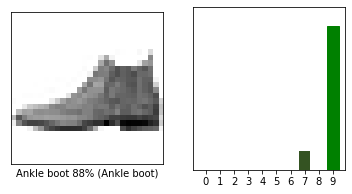

In [41]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction[i],test_labels)
plt.show()

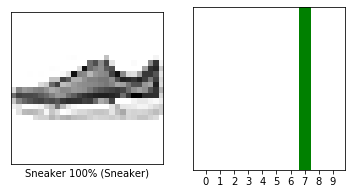

In [43]:
i=9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction[i],test_labels)
plt.show()

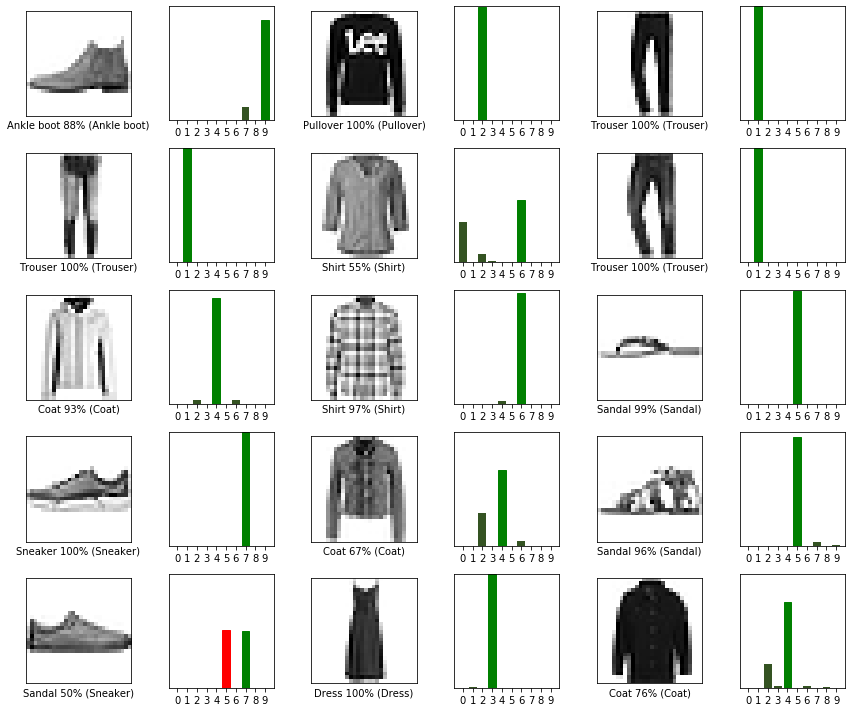

In [44]:
num_rows = 5
num_columns = 3
num_images = num_rows*num_columns
plt.figure(figsize=(2*2*num_columns,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_columns,2*i+1)
    plot_image(i,prediction[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_columns,2*i+2)
    plot_value_array(i,prediction[i],test_labels)
plt.tight_layout()
plt.show()